In [653]:
from matplotlib import pyplot as plt
import numpy as np
#from sympy import *
#from sympy import MatrixSymbol, Matrix
import math
import cmath
import pandas as pd

# Database e input dati

In [654]:
# da interno a esterno

# gli input sono le key: descrizione, strati, spessori, trasmittane, mu, 
#                        densità, caloreSpecifico
# alla fine del calcolo saranno salvate key
pareti = {
     "1a" : {
        "descrizione"     : "Parete in muratura con isolante interno",
        "strati"          : ["Intonaco","Isolante RockDuo","Laterizio Poroton","Intonaco"],
        "spessori"        : np.array([0.015,0.14,0.2,0.015]),
        "trasmittanze"    : np.array([0.6,0.035,0.23,0.9]),
        "mu"              : np.array([6.,1.,10.,8.]),
        "densità"         : np.array([1500.,1200.,860.,1800.]),
        "caloreSpecifico" : np.array([1000.,1500.,840.,1000.])
    },
    "1b" : {
        "descrizione"     : "Parete in muratura con isolante esterno",
        "strati"          : ["Intonaco","Laterizio Poroton","Isolante RockDuo","Intonaco"],
        "spessori"        : np.array([0.015,0.2,0.14,0.015]),
        "trasmittanze"    : np.array([0.6,0.23,0.035,0.9]),
        "mu"              : np.array([6.,10.,1.,8.]),
        "densità"         : np.array([1500.,860.,1200.,1800.]),
        "caloreSpecifico" : np.array([1000.,840.,1500.,1000.])
    },
    "3a" : {
        "descrizione"     : "Perete in X-LAM con isolante bassa densità NOME",
        "strati"          : ["Gessofibra","X-LAM KLH","Isolante bassa densità NOME","Intonaco calce"],
        "spessori"        : np.array([0.013,0.096,0.12,0.015]),
        "trasmittanze"    : np.array([0.21,0.13,0.038,0.9]),
        "mu"              : np.array([5.,25.,1.,20.]),
        "densità"         : np.array([1150.,500.,50.,1800.]),
        "caloreSpecifico" : np.array([1100.,1600.,2100.,1000.])
    },
    "3b" : {
        "descrizione"     : "Perete in X-LAM con isolante bassa densità lana di roccia",
        "strati"          : ["Gessofibra","X-LAM KLH","Isolante ventirockduo","Intonaco calce"],
        "spessori"        : np.array([0.013,0.096,0.105,0.015]),
        "trasmittanze"    : np.array([0.21,0.13,0.035,0.9]),
        "mu"              : np.array([5.,25.,1.,20.]),
        "densità"         : np.array([1150.,500.,70.,1800.]),
        "caloreSpecifico" : np.array([1100.,1600.,1030.,1000.])
    },
    "3c" : {
        "descrizione"     : "Perete in X-LAM con isolante alta densità fibra di legno",
        "strati"          : ["Gessofibra","X-LAM KLH","Isolante alta densità Naturalia Diffuterm","Intonaco calce"],
        "spessori"        : np.array([0.013,0.096,0.13,0.015]),
        "trasmittanze"    : np.array([0.21,0.13,0.043,0.9]),
        "mu"              : np.array([5.,25.,5.,20.]),
        "densità"         : np.array([1150.,500.,190.,1800.]),
        "caloreSpecifico" : np.array([1100.,1600.,2100.,1000.])
    }
    
      
}

In [655]:
#paretiOutput=pareti.copy()


In [767]:
# INPUT DATI:

# Scegliere la parete
parete = "3c" # eseguire da qui in giù altrimento il dizionario di output si resetta

Ti=20.
Te=-5.
URi=0.65
URe=0.9 #0.9 forse

# in orizzontale:
Rsi=0.130
Rse=0.040

# Tempo dinamica
tempo = 24 # ore -> secondi=86400


print(pareti[parete]["descrizione"])
spessori = pareti[parete]["spessori"]
trasmittanze = pareti[parete]["trasmittanze"]
mu = pareti[parete]["mu"]
densità = pareti[parete]["densità"]
caloreSpecifico = pareti[parete]["caloreSpecifico"]

spessoreTot = sum(spessori)
print("Spessore totale = ",spessoreTot)

if len(pareti[parete]["strati"])==len(spessori)==len(trasmittanze)==len(mu)==len(densità)==len(caloreSpecifico):
    print("Dimensioni ok")
else:
    print("Devono avere la stessa lunghezza!")

Perete in X-LAM con isolante alta densità fibra di legno
Spessore totale =  0.254
Dimensioni ok


In [768]:
# Spessori equivalenti (metri)
Sd = spessori * mu 
Sdtot = sum(Sd)
SdCumSum = Sd.cumsum()
SdCumSum = np.insert(SdCumSum,0,0.)
print(Sd)
print(Sdtot)
print(SdCumSum)

[0.065 2.4   0.65  0.3  ]
3.4149999999999996
[0.    0.065 2.465 3.115 3.415]


In [769]:
resistenze = spessori/trasmittanze
# Aggiunge le resistenze superficiali al vettore resistenze e calcola la somma cumolata
resistenze = np.insert(resistenze,0,Rsi)
resistenze = np.append(resistenze,Rse)
resistenze = np.array(resistenze)
Rtot = sum(resistenze)
resistenzeCumSum = resistenze.cumsum()

print("resistenze = ",resistenze)
print("resistemzeCumSum = ",resistenzeCumSum)
print("Resistenza totale =", Rtot)
print("Trasmittanza termica U = ",1/Rtot)

resistenze =  [0.13       0.06190476 0.73846154 3.02325581 0.01666667 0.04      ]
resistemzeCumSum =  [0.13       0.19190476 0.9303663  3.95362211 3.97028878 4.01028878]
Resistenza totale = 4.010288780986456
Trasmittanza termica U =  0.2493586009918265


In [770]:
# Calcola le temperature superficiali i-esimme

deltaT = Ti-Te
temperature = np.array([])

for i in range(0,len(resistenze)):
    T = Ti-((resistenzeCumSum[i]*deltaT)/Rtot)
    temperature = np.append(temperature,T)

# Ritorna alla dimensione inziale aggiungendo la Ti all'inizio. L'ultima è già la Te    
temperature = np.insert(temperature,0,Ti)

print("Temperature superficiali = ",temperature)     

Temperature superficiali =  [20.         19.18958455 18.80367243 14.20012902 -4.64674198 -4.7506414
 -5.        ]


In [771]:
# Pressione di saturazione per ogni temperatura i-esima

pressioniSaturazione = np.array([])

for temp in temperature:
    if temp >= 0:
        press = 610.5*np.exp(17.269*temp/(237.3+temp))
    else:
        press = 610.5*np.exp(21.875*temp/(265.5+temp))
        
    pressioniSaturazione = np.append(pressioniSaturazione,press)   
    
print("pressioni saturazione = ",pressioniSaturazione)     

pressioni saturazione =  [2336.9511438  2222.25966223 2169.39745901 1618.59809229  413.47839257
  409.82636569  401.18098135]


In [772]:
Pi = URi * pressioniSaturazione[0]
Pe = URe * pressioniSaturazione[-1]
deltaP = Pi - Pe
pressioni = np.array([])
for p in range(1,len(temperature)-2): #valori interni a T perché conosciamo già gli estremi
    P=Pi-((SdCumSum[p]*deltaP)/Sdtot)
    pressioni = np.append(pressioni,P)

# Ritorna alla dimensione inziale aggiungendo la Pi all'inizio. L'ultima è già la Pe    
pressioni = np.insert(pressioni,0,Pi)

print("Pi = ", Pi)
print("Pe = ", Pe)
print("Pressioni interne = ", pressioni)

Pi =  1519.0182434715223
Pe =  361.06288321648987
Pressioni interne =  [1519.01824347 1496.97809752  683.18809324  462.78663375  361.06288322]


In [773]:
spessoriCumSum = spessori.cumsum()
spessoriCumSum = np.insert(spessoriCumSum,0,0.) 
print("spessoriCumSum = ", spessoriCumSum)

spessoriCumSum =  [0.    0.013 0.109 0.239 0.254]


In [774]:
#plt.style.available

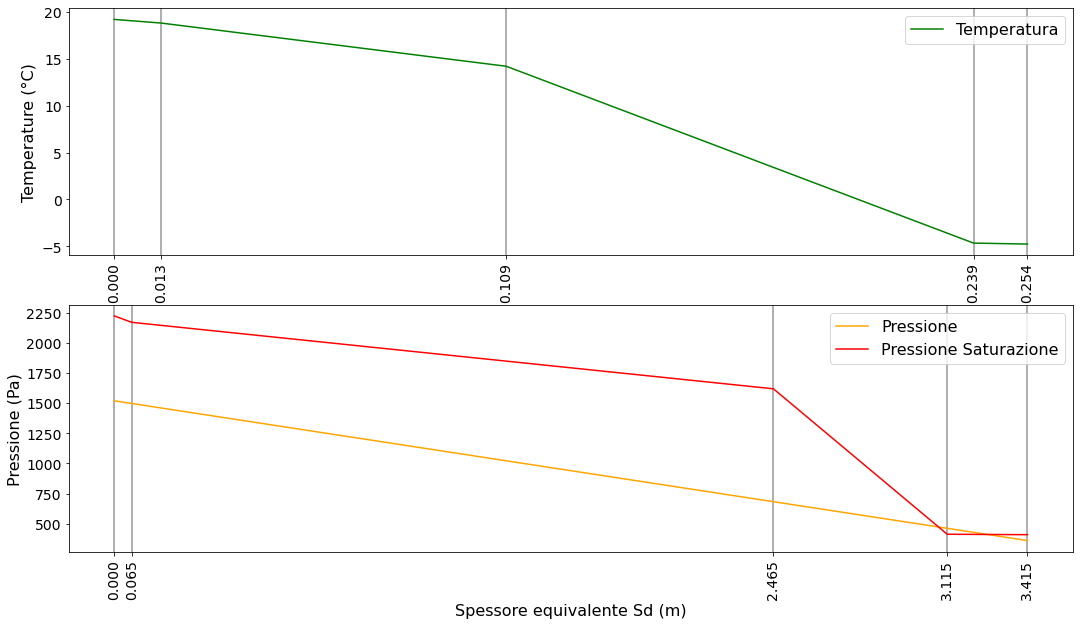

In [775]:
#plt.style.use('fast')

plt.figure(figsize=(18,10))


plt.subplot(2, 1, 1)
plt.plot(spessoriCumSum,temperature[1:-1],label="Temperatura",color='green')
plt.ticklabel_format(style='sci')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore parete (m)",fontsize=16)  
plt.ylabel("Temperature (°C)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(spessoriCumSum, rotation=90, fontsize=14)
#plt.yticks(temperature,fontsize=12) #i due vettori affiancati
plt.yticks(fontsize=14)

plt.subplot(2,1,2)
plt.plot(SdCumSum,pressioni,label="Pressione",color='orange')
plt.plot(SdCumSum,pressioniSaturazione[1:-1], label="Pressione Saturazione",color='red')
#plt.plot(SdCumSum,100*temperature[1:-1],label="temperature",color='green')
plt.ticklabel_format(style='sci')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore equivalente Sd (m)",fontsize=16)  
plt.ylabel("Pressione (Pa)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(SdCumSum,fontsize=14,rotation=90,color='black')
#plt.yticks(np.hstack((pressioni,pressioniSaturazione)),fontsize=14) #i due vettori affiancati
plt.yticks(fontsize=14)

import tikzplotlib
# modificare a mano:
# \begin{groupplot}[group style={group size=1 by 2,vertical sep=2.5cm}]
tikzplotlib.save("temperatura+pressione--parete-"+parete+".tex",
                 axis_width='\\linewidth',
                 axis_height='7cm',
                 strict=True,
                 extra_axis_parameters={'\t ticklabel style={ \n \t\t /pgf/number format/fixed, \n \t\t /pgf/number format/precision=5\n\t\t}, \nscaled ticks=false'}
                )

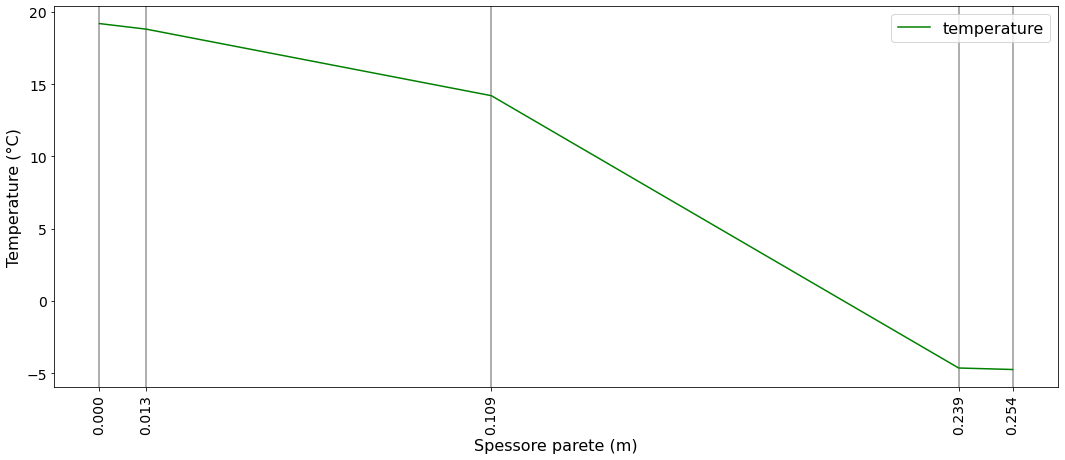

In [776]:
#plt.style.use('fast')

plt.figure(figsize=(18,7))
plt.plot(spessoriCumSum,temperature[1:-1],label="temperature",color='green')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore parete (m)",fontsize=16)  
plt.ylabel("Temperature (°C)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(spessoriCumSum, rotation=90, fontsize=14)
#plt.yticks(temperature,fontsize=12) #i due vettori affiancati
plt.yticks(fontsize=14)


import tikzplotlib



(array([ 250.,  500.,  750., 1000., 1250., 1500., 1750., 2000., 2250.,
        2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

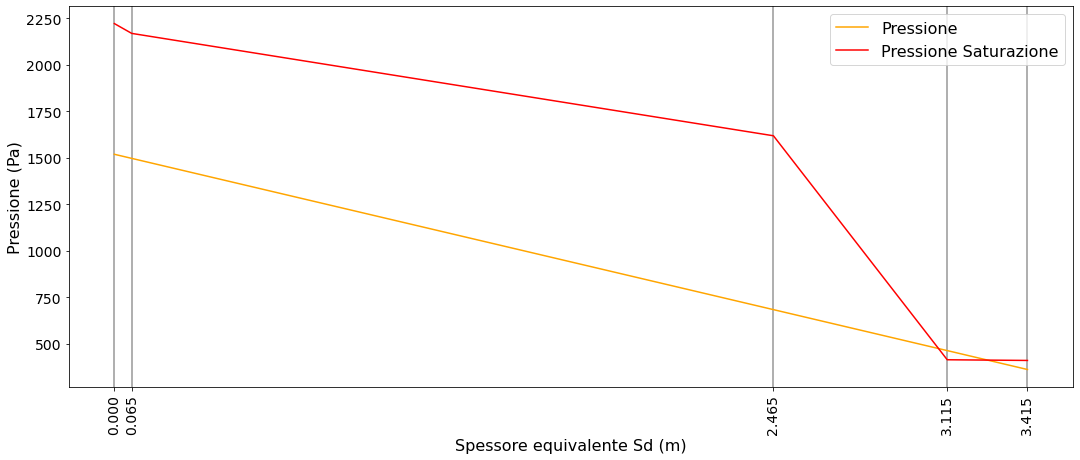

In [777]:
plt.figure(figsize=(18,7))

plt.plot(SdCumSum,pressioni,label="Pressione",color='orange')
plt.plot(SdCumSum,pressioniSaturazione[1:-1], label="Pressione Saturazione",color='red')
#plt.plot(SdCumSum,100*temperature[1:-1],label="temperature",color='green')
plt.ticklabel_format(style='sci')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore equivalente Sd (m)",fontsize=16)  
plt.ylabel("Pressione (Pa)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(SdCumSum,fontsize=14,rotation=90,color='black')
#plt.yticks(np.hstack((pressioni,pressioniSaturazione)),fontsize=14) #i due vettori affiancati
plt.yticks(fontsize=14)





In [778]:
np.hstack((pressioni,pressioniSaturazione))

array([1519.01824347, 1496.97809752,  683.18809324,  462.78663375,
        361.06288322, 2336.9511438 , 2222.25966223, 2169.39745901,
       1618.59809229,  413.47839257,  409.82636569,  401.18098135])

In [779]:
profonditàPenetrazione = np.sqrt((trasmittanze*tempo*3600)/(  math.pi*densità * caloreSpecifico))
xi = spessori/profonditàPenetrazione
print("Profondità penetrazione (delta) = ",profonditàPenetrazione)
print("xi = ",xi)

# Calcola le matrice di trasferimento di ogni strato e le inserisce in una lista, 
# per poi moltiplicarle tra di loro in Z

zz = [] # zz : lista di matrici z
for i in range(0,len(xi)):
    # z : matrice per ogni strato
    z = np.zeros((2,2),dtype=np.complex128) # matrice complex float
    z[0][0] = complex(  (np.cosh(xi[i])*np.cos(xi[i])) , (np.sinh(xi[i])*np.sin(xi[i]))  )
    z[1][1] = z[0][0] 
    z[0][1] = -(profonditàPenetrazione[i]/(2*trasmittanze[i])) * complex(  (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i])) , (np.cosh(xi[i])*np.sin(xi[i]) - np.sinh(xi[i])*np.cos(xi[i]))  )
    z[1][0] = -(trasmittanze[i]/( profonditàPenetrazione[i]))  * complex(  (np.sinh(xi[i])*np.cos(xi[i]) - np.cosh(xi[i])*np.sin(xi[i])) , (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i]))  )
    # aggiunge alla lista zz
    zz.append(z)
print("zz = ",zz)

# Z: matrice di trasferimento totale  del componente edilizio = Z_N * Z_n-1 * ... * Z_1   
Z = np.zeros((2,2),dtype=np.complex128)
Z = zz[-1] #Z_N
for i in range(1,len(zz)): # [1  2 ... N  N+1)
    Z = Z.dot(zz[-1-i]) # prodotto scalare
print("Z =",Z)   

Profondità penetrazione (delta) =  [0.06756882 0.06685111 0.05444145 0.1172646 ]
xi =  [0.19239644 1.43602703 2.38788626 0.12791584]
zz =  [array([[ 0.99977163+3.70158267e-02j, -0.06190193-7.63825292e-04j],
       [ 0.01475605-1.19585953e+00j,  0.99977163+3.70158267e-02j]]), array([[ 0.29840601+1.96506319j, -0.63437138-0.49735475j],
       [ 3.76154045-4.79780999j,  0.29840601+1.96506319j]]), array([[-4.00390321+3.6949984j ,  0.11338502-4.87110912j],
       [ 6.0776451 +0.14146961j, -4.00390321+3.6949984j ]]), array([[ 0.99995538+1.63624131e-02j, -0.01666652-9.09024493e-05j],
       [ 0.01070919-1.96347789e+00j,  0.99995538+1.63624131e-02j]])]
Z = [[-31.25419731 -45.05282189j  16.15391533  +1.02622969j]
 [-96.26036559+122.1967833j  -10.64130924 -44.65800934j]]


In [780]:
# Strato d'aria interno 
Zsi = np.zeros((2,2),dtype=np.complex128)
Zsi[0][0] = complex(1,0)
Zsi[1][1] = complex(1,0)
Zsi[0][1] = complex(-Rsi)
Zsi[1][0] = complex(0,0)
print("Zsi = ",Zsi)

# Strato d'aria esterno
Zse = np.zeros((2,2),dtype=np.complex128)
Zse[0][0] = complex(1,0)
Zse[1][1] = complex(1,0)
Zse[0][1] = complex(-Rse)
Zse[1][0] = complex(0,0)
print("Zse = ",Zse)

# Zee: matrice di trasferimento da ambiente ad ambiente 
Zee = Zse.dot(Z)
Zee = Zee.dot(Zsi)
print("Zee = ",Zee)

Zsi =  [[ 1.  +0.j -0.13+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zse =  [[ 1.  +0.j -0.04+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zee =  [[-27.40378269 -49.94069322j  20.14205945  +9.30484018j]
 [-96.26036559+122.1967833j    1.87253829 -60.54359117j]]


In [781]:
Y12 = -1/Zee[0][1]
Y12 = np.sqrt((Y12.real)**2 + (Y12.imag)**2) # il modulo
print("Y12 = ", Y12, "(trasmittanza termica periodica)")

#f = -np.sqrt((Y12.real)**2 + (Y12.imag)**2)/(1/Rtot)
fd = -Y12/(1/Rtot)
print("fd = ", fd, "(attenuazione)")

phase = (math.atan2(Zee[0][1].imag,Zee[0][1].real))*tempo/(2*math.pi) # tempo in ore
sfasamento = phase+tempo/2 # tempo in ore
print("phase = ", phase)
print("sfasamento = ", sfasamento, "[ore]")

Y11 = -Zee[0][0]/Zee[0][1]
Y11 = np.sqrt((Y11.real)**2 + (Y11.imag)**2) # il modulo
print("Y11 = ", Y11, "(ammettenza termica interna Yii)")

Y22 = -Zee[1][1]/Zee[0][1]
Y22 = np.sqrt((Y22.real)**2 + (Y22.imag)**2) # il modulo
print("Y22 = ", Y22, "(ammettenza termica esterna Yee)")

Y12 =  0.04507053911675081 (trasmittanza termica periodica)
fd =  -0.180745877372917 (attenuazione)
phase =  1.6530054745664458
sfasamento =  13.653005474566445 [ore]
Y11 =  2.5674547014793765 (ammettenza termica interna Yii)
Y22 =  2.7300371186882746 (ammettenza termica esterna Yee)


In [782]:
1-Rsi*Y22

0.6450951745705242

In [783]:
massaSuperficiale = spessori*densità
massaSuperficialeTot = sum(massaSuperficiale)
print("Massa superficiale = ", massaSuperficialeTot)

capacitàTermicaAreica = spessori*densità*caloreSpecifico
capacitàTermicaAreicaTot = sum(capacitàTermicaAreica)
print("Capacità termica areica = ", capacitàTermicaAreica, "\nTotale = ", capacitàTermicaAreicaTot )

Massa superficiale =  114.65
Capacità termica areica =  [16445. 76800. 51870. 27000.] 
Totale =  172115.0


In [784]:
# Salvataggio output su un nuovo dizionario
#paretiOutput=pareti.copy()

paretiOutput[parete]["Sd"]=Sd
paretiOutput[parete]["spessoreTot"]=spessoreTot
paretiOutput[parete]["resistenze"]=resistenze
paretiOutput[parete]["resistenzeTot"]=Rtot
paretiOutput[parete]["temperature"]=temperature
paretiOutput[parete]["pressioniSaturazione"]=pressioniSaturazione
paretiOutput[parete]["pressioni"]=pressioni
paretiOutput[parete]["profonditàPenetrazione"]=profonditàPenetrazione
paretiOutput[parete]["xi"]=xi
paretiOutput[parete]["attenuazione"]=fd
paretiOutput[parete]["sfasamento"]=sfasamento
paretiOutput[parete]["trasmittanzaTermicaPeriodica"]=Y12
paretiOutput[parete]["ammettanzaInterna"]=Y11
paretiOutput[parete]["ammettanzaEsterna"]=Y22
paretiOutput[parete]["capacitàTermicaAreica"]=capacitàTermicaAreica
paretiOutput[parete]["massaSuperficiale"]=massaSuperficiale
paretiOutput[parete]["massaSuperficialeTot"]=massaSuperficialeTot
paretiOutput[parete]["capacitàTermicaAreicaTot"]=capacitàTermicaAreicaTot


paretiOutput[parete]

{'descrizione': 'Perete in X-LAM con isolante alta densità fibra di legno',
 'strati': ['Gessofibra',
  'X-LAM KLH',
  'Isolante alta densità Naturalia Diffuterm',
  'Intonaco calce'],
 'spessori': array([0.013, 0.096, 0.13 , 0.015]),
 'trasmittanze': array([0.21 , 0.13 , 0.043, 0.9  ]),
 'mu': array([ 5., 25.,  5., 20.]),
 'densità': array([1150.,  500.,  190., 1800.]),
 'caloreSpecifico': array([1100., 1600., 2100., 1000.]),
 'Sd': array([0.065, 2.4  , 0.65 , 0.3  ]),
 'spessoreTot': 0.254,
 'resistenze': array([0.13      , 0.06190476, 0.73846154, 3.02325581, 0.01666667,
        0.04      ]),
 'resistenzeTot': 4.010288780986456,
 'temperature': array([20.        , 19.18958455, 18.80367243, 14.20012902, -4.64674198,
        -4.7506414 , -5.        ]),
 'pressioniSaturazione': array([2336.9511438 , 2222.25966223, 2169.39745901, 1618.59809229,
         413.47839257,  409.82636569,  401.18098135]),
 'pressioni': array([1519.01824347, 1496.97809752,  683.18809324,  462.78663375,
         

In [785]:
print("Sfasamento:") 
for key in pareti.keys():
    if "sfasamento" in pareti[key].keys():
        print("parete" ,key," : ",pareti[key]["sfasamento"])

print("Attenuazione:")        
for key in pareti.keys():
    if "attenuazione" in pareti[key].keys():
        print("parete" ,key," : ",pareti[key]["attenuazione"])        

Sfasamento:
parete 1a  :  6.480885268642209
parete 1b  :  6.5519344543111275
parete 3a  :  9.207990430094306
parete 3b  :  8.338454460124943
parete 3c  :  13.653005474566445
Attenuazione:
parete 1a  :  -0.0048818146213937
parete 1b  :  -0.004502461450560935
parete 3a  :  -0.34205971533349355
parete 3b  :  -0.3683648964451135
parete 3c  :  -0.180745877372917


In [786]:
col = ['strati','spessori','trasmittanze','mu']#colonne da tenere
df = pd.DataFrame(pareti[parete],columns=col) 

with open('tabella-input-'+parete+'.tex','w') as f:
    f.write(
            df.to_latex(
            index=False,
            decimal=",",
            caption=pareti[parete]["descrizione"],
            column_format="lrrr",
            header=["Strati","Spessori","Trasmitttanza", "mu"],
            )
        )
    f.close()
df   

,strati,spessori,trasmittanze,mu
0,Gessofibra,0.013,0.210,5.0
1,X-LAM KLH,0.096,0.130,25.0
2,Isolante alta densità Naturalia Diffuterm,0.130,0.043,5.0
3,Intonaco calce,0.015,0.900,20.0


In [787]:
totalDF = pd.DataFrame(pareti)
totalDF

,1a,1b,3a,3b,3c
descrizione,Parete in muratura con isolante interno,Parete in muratura con isolante esterno,Perete in X-LAM con isolante bassa densità NOME,Perete in X-LAM con isolante bassa densità lan...,Perete in X-LAM con isolante alta densità fibr...
strati,"[Intonaco, Isolante RockDuo, Laterizio Poroton...","[Intonaco, Laterizio Poroton, Isolante RockDuo...","[Gessofibra, X-LAM KLH, Isolante bassa densità...","[Gessofibra, X-LAM KLH, Isolante ventirockduo,...","[Gessofibra, X-LAM KLH, Isolante alta densità ..."
spessori,"[0.015, 0.14, 0.2, 0.015]","[0.015, 0.2, 0.14, 0.015]","[0.013, 0.096, 0.12, 0.015]","[0.013, 0.096, 0.105, 0.015]","[0.013, 0.096, 0.13, 0.015]"
trasmittanze,"[0.6, 0.035, 0.23, 0.9]","[0.6, 0.23, 0.035, 0.9]","[0.21, 0.13, 0.038, 0.9]","[0.21, 0.13, 0.035, 0.9]","[0.21, 0.13, 0.043, 0.9]"
mu,"[6.0, 1.0, 10.0, 8.0]","[6.0, 10.0, 1.0, 8.0]","[5.0, 25.0, 1.0, 20.0]","[5.0, 25.0, 1.0, 20.0]","[5.0, 25.0, 5.0, 20.0]"
densità,"[1500.0, 1200.0, 860.0, 1800.0]","[1500.0, 860.0, 1200.0, 1800.0]","[1150.0, 500.0, 50.0, 1800.0]","[1150.0, 500.0, 70.0, 1800.0]","[1150.0, 500.0, 190.0, 1800.0]"
caloreSpecifico,"[1000.0, 1500.0, 840.0, 1000.0]","[1000.0, 840.0, 1500.0, 1000.0]","[1100.0, 1600.0, 2100.0, 1000.0]","[1100.0, 1600.0, 1030.0, 1000.0]","[1100.0, 1600.0, 2100.0, 1000.0]"
Sd,"[0.09, 0.14, 2.0, 0.12]","[0.09, 2.0, 0.14, 0.12]","[0.065, 2.4, 0.12, 0.3]","[0.065, 2.4, 0.105, 0.3]","[0.065, 2.4, 0.65, 0.3]"
spessoreTot,0.37,0.37,0.244,0.229,0.254
resistenze,"[0.13, 0.025, 4.0, 0.8695652173913043, 0.01666...","[0.13, 0.025, 0.8695652173913043, 4.0, 0.01666...","[0.13, 0.06190476190476191, 0.7384615384615385...","[0.13, 0.06190476190476191, 0.7384615384615385...","[0.13, 0.06190476190476191, 0.7384615384615385..."


In [788]:
fd


-0.180745877372917

In [829]:
col = ['strati','spessori','densità','caloreSpecifico','massaSuperficiale','profonditàPenetrazione','xi']#colonne da tenere
df = pd.DataFrame(pareti[parete],columns=col) 
df = df.round({'profonditàPenetrazione':3,'xi':3}) # arrotonda le cifre decimali
# oppure
# decimals = pd.Series([3,3], index=['profonditàPenetrazione','xi'])
# df = df.round(decimals)

with open('tabella-dinamica-'+parete+'.tex','w') as f:
    f.write(
            df.to_latex(
            index=False,
            decimal=",",
            caption=pareti[parete]["descrizione"],
            column_format="lrrrrrr",
            header=["Strati","Spessori","Densità", "Calore specifico","Massa superficiale","Profondità di Penetrazione","xi"],
            )
        )  
    f.write("\n\\begin{flushleft}\n")
    f.write("\\begin{align*}\n")
    f.write("\\text{Massa superficiale totale} &= \SI{")
    f.write(str(massaSuperficialeTot))
    f.write("}{\\kilo\\gram\\per\squaremetre}\\\\\n")
    f.write("\\text{Sfasamento} &= \SI{")
    f.write(str(round(sfasamento,2)))
    f.write("}{\\hour}\\\\\n")
    f.write("\\text{Attenuazione} &= \SI{")
    f.write(str(abs(round(fd,3))))
    f.write("}{}\n")
    f.write("\\end{align*}")
    f.write("\n\\end{flushleft}\n")
f.close()
df   

,strati,spessori,densità,caloreSpecifico,massaSuperficiale,profonditàPenetrazione,xi
0,Gessofibra,0.013,1150.0,1100.0,14.95,0.068,0.192
1,X-LAM KLH,0.096,500.0,1600.0,48.00,0.067,1.436
2,Isolante alta densità Naturalia Diffuterm,0.130,190.0,2100.0,24.70,0.054,2.388
3,Intonaco calce,0.015,1800.0,1000.0,27.00,0.117,0.128


In [790]:
# Crea delle liste dei valori dentro al dizionario che è dentro all'altro dizionario
# esempio:   prova = makeListFromDoubleDicts(pareti,'descrizione')
def makeListFromDoubleDicts(dict1,dictKey):
    self = [] 
    for i in dict1.keys():
        self.append(dict1[i][dictKey])
    return self   

In [791]:
paretiOutput[parete]['capacitàTermicaAreicaTot']

172115.0

In [807]:
resistenzeTot=makeListFromDoubleDicts(paretiOutput,'resistenzeTot')
sfasamenti=makeListFromDoubleDicts(pareti,'sfasamento')
masseSuperficiali=makeListFromDoubleDicts(pareti,'massaSuperficialeTot')
attenuazioni=makeListFromDoubleDicts(pareti,'attenuazione')
spessoriTot=makeListFromDoubleDicts(pareti,'spessoreTot')
capacitàTermicaAreiche=makeListFromDoubleDicts(pareti,'capacitàTermicaAreicaTot')



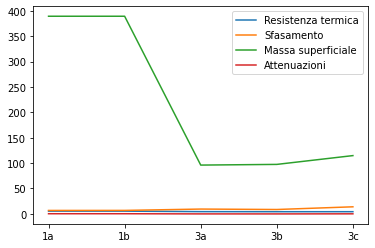

In [809]:
# mettere senza asse y oppure con doppi assi
# scegliere le altre proprietà da stapare
# mettere solo i punti, senza l'unione linee

plt.plot(paretiOutput.keys(),resistenzeTot,label='Resistenza termica')
plt.plot(paretiOutput.keys(),sfasamenti,label='Sfasamento')
plt.plot(paretiOutput.keys(),masseSuperficiali,label='Massa superficiale')
plt.plot(paretiOutput.keys(),attenuazioni,label='Attenuazioni')


plt.legend(loc='best')


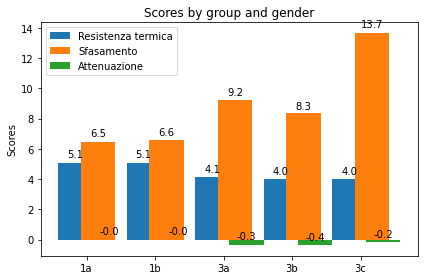

In [810]:

labels = paretiOutput.keys()

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, resistenzeTot, width, label='Resistenza termica')
rects2 = ax.bar(x + width/3, sfasamenti, width, label='Sfasamento')
rects3 = ax.bar(x + 2*width/3, attenuazioni, width, label='Attenuazione')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()

plt.show()

<BarContainer object of 4 artists>

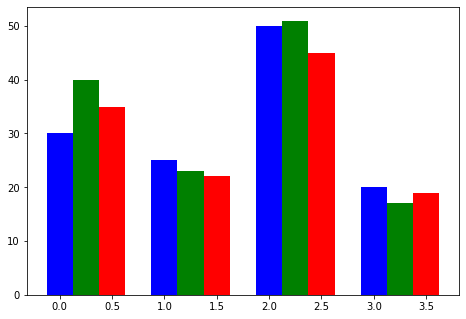

In [811]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

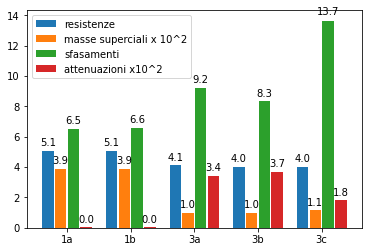

In [828]:
#  https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
            autolabel(bar)
        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(),loc='best')


if __name__ == "__main__":
    # Usage example:
    data = {
        "resistenze": resistenzeTot,
        "masse superciali x 10^2": np.array(masseSuperficiali)*0.01,
        "sfasamenti": sfasamenti,
        "attenuazioni x10^2": abs(np.array(attenuazioni))*10
    }

    fig, ax = plt.subplots()
    ax.set_xticks(x)
    ax.set_xticklabels(list(paretiOutput.keys()))
    bar_plot(ax, data, total_width=.8, single_width=.9)
    tikzplotlib.save("confronto.tex",
                 axis_width='\\linewidth',
                 axis_height='15cm',
                 #strict=True,
                 #extra_axis_parameters={'\t ticklabel style={ \n \t\t /pgf/number format/fixed, \n \t\t /pgf/number format/precision=5\n\t\t}, \nscaled ticks=false'}
                )

In [824]:
attenuazioni

[-0.0048818146213937,
 -0.004502461450560935,
 -0.34205971533349355,
 -0.3683648964451135,
 -0.180745877372917]